In [1]:
#install the surprise 
# pip install scikit-surpriseimport os
import pandas as pd # use dataframes, for data analysis 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset,Reader
from surprise.model_selection import cross_validate

In [4]:
#several datasets predefined in surprise, here we user ml-100k
# data is a Dataset object
# predefined dataset
data = Dataset.load_builtin("ml-100k")

# If we want to load another dataset
# df = pd.read_csv('ml-100k/u.data',sep = '\t',usecols = range(3),header = None, names=('user', 'item', 'rating')) # load the 3 first columns
#df = pd.read_csv('u1.base',sep = '\t',usecols = range(3),header = None) # load the 3 first columns

# A reader is needed with the rating_scale param required.
reader = Reader(rating_scale=(1, 5))
# load data in a dataframe
# data = Dataset.load_from_df(df, reader)


In [6]:
# statistics about the dataset

# display the distribution of ratings
plt.figure(figsize = (10, 6))
ax = sns.countplot(x=df['rating'], data=df)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 10)
plt.title("Distribution of Ratings in the dataset", fontsize = 12)
plt.xlabel("Ratings", fontsize = 12)
plt.ylabel("Number of Ratings", fontsize = 12)
plt.show()

print("the number of ratings is",df.shape[0])
print("the average rating value is ",df['rating'].mean())
print("sparsity is ",100-(df.shape[0]/(df['item'].max()*df['user'].max())*100))



TypeError: 'DatasetAutoFolds' object is not subscriptable

<Figure size 1000x600 with 0 Axes>

In [4]:
#collaborative filtering
#memory-based approach
from surprise import KNNBasic,KNNWithMeans,accuracy
from surprise.model_selection import train_test_split

# split dataset into 80% train and 20% test
trainset, testset=train_test_split(data, test_size=0.2)



In [5]:
#user-based Cosine
sim_options = {
    "user_based": True,  # compute  similarities between users
    "name":"cosine"
}

# With K=20 neighbors
algo = KNNBasic(sim_options=sim_options,k=20, min_k=5) #default value of k is 40
 
#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset) # compute similarities
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

# Let us make K change K=40
algo = KNNBasic(sim_options=sim_options,k=40, min_k=5) #default value of k is 40
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0257
MAE:  0.8091
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0185
MAE:  0.8050


0.805020382667566

In [6]:
#user-based Pearson
sim_options = {
    "user_based": True,  # compute  similarities between users
    "name":"pearson"
}
algo = KNNWithMeans(sim_options=sim_options,k=40, min_k=5) #default value of k is 40


# 
#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9470
MAE:  0.7418


0.7417669747824345

In [105]:
#item-based (Cosine)
sim_options = {
    "user_based": False,  # compute  similarities between users
    "name":"cosine"
}
algo = KNNBasic(sim_options=sim_options,k=40, min_k=5) #default value of k is 40
# 
#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0232
MAE:  0.8123


0.8123362671636754

In [9]:
# user-based with Pearson and cross-validation
sim_options = {
    "name": "pearson",
    "user_based": True,  # compute  similarities between items
}
algo = KNNBasic(sim_options=sim_options, k=40,min_k=20)
cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0293  1.0230  1.0331  1.0302  1.0279  1.0287  0.0033  
MAE (testset)     0.8189  0.8124  0.8224  0.8206  0.8171  0.8183  0.0034  
Fit time          0.46    0.44    0.44    0.45    0.45    0.45    0.01    
Test time         3.26    2.63    2.57    2.62    2.54    2.72    0.27    


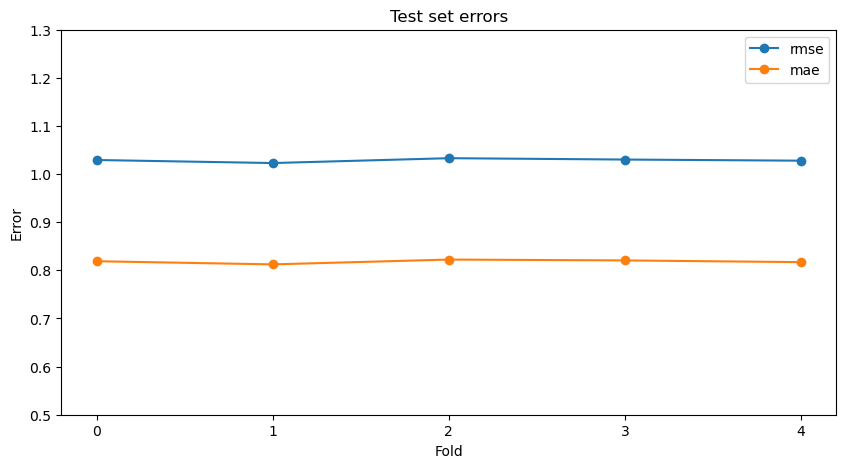

In [10]:
# Visualize
import matplotlib.pyplot as plt

rmse = cv['test_rmse']
mae = cv['test_mae']
x = np.arange(len(rmse))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x), max(x) + 2, 1.0))
plt.ylim(0.5, 1.3)
ax.plot(x, rmse, marker='o', label="rmse")
ax.plot(x, mae, marker='o', label="mae")

# Chart setup
plt.title("Test set errors", fontsize = 12)
plt.xlabel("Fold", fontsize = 10)
plt.ylabel("Error", fontsize = 10)
plt.legend()
plt.show()